# Assignment 4: Dino Fun World Time Series Analysis

### Assignment Description

The administrators of Dino Fun World, a local amusement park, have asked you, one of their data analysts, to perform three data analysis tasks for the park. These tasks will involve understanding, analyzing, and graphing attendance data that the park has provided for you to use in the form of a database.

Question 1: The park's administrators are worried about the attendance at the ride 'Atmosfear' in the data window. To assuage their fears, they have asked you to create a control chart of the total attendance at this ride. Using the provided data, create a control chart displaying the attendance, mean, and standard deviation bands at one and two standard deviations. (You need to print your data in this question)

Question 2: Some of the park's administrators are having trouble interpreting the control chart graph of 'Atmosfear' attendance, so they ask you to also provide a moving average chart of the attendance in addition to the control chart created in Part 1. In this case, they request that you use 50 samples for the size of the moving average window.

Question 3: In order to have options concerning the graphs presented, the park's administrators also ask you to provide a 50-sample moving average window with the average computed with exponential weighting (i.e., an exponentially weighted moving average) over the same 'Atmosfear' attendance data.

**Hint:**  Use “%matplotlib inline” to display the graph on the Jupyter Notebook(To allow the grader to identify the PartID, add the cell magic after the Graded Cell and PartID comments.).

### Directions

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkin', 'attractions', and 'sequences'. The database file is named 'dinofunworld.db' and is available in the read only directory of the Jupyter Notebook environment (i.e., readonly/dinofunworld.db). It can also be accessed by selecting File > Open > readonly/dinofunworld.db.

The information contained in each of these tables is listed below:

`checkin`:
    - The check-in data for all visitors for the day in the park. The data includes two types of check-ins: inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carousel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
    - Fields: visitorID, sequence
    
Using the data provided, perform the required analyses and create the requested charts.

### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly.  

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

**NOTE:**  For each question, be sure to add your code in the exact cell that has the comment ```"# Graded Cell, PartID:______"```. If you add extra cells or split your code up into multiple cells, ensure you are displaying your output in the cell containing the comment with regard to each question.


**NOTE:**  If you lose the partId that is mentioned in the first line of each cell with regard to each question, use the syntax described below to add it.
* Question 1: # Graded Cell, PartID : BZjRz 
* Question 2: # Graded Cell, PartID : Z9m56
* Question 3: # Graded Cell, PartID : 3KxS2

### Question 1:
Create and display a control chart showing attendance at the ride 'Atmosfear' over the data provided. In the control chart, display the attendance, the mean attendance, and bands for one and two standard deviations away from the average.

**Note:** For this question, display the control chart in the notebook. You are asked to print the data used to create the control chart such as attendance as a list(ex: [0,1,2,3...]), the mean attendance, and the standard deviation.


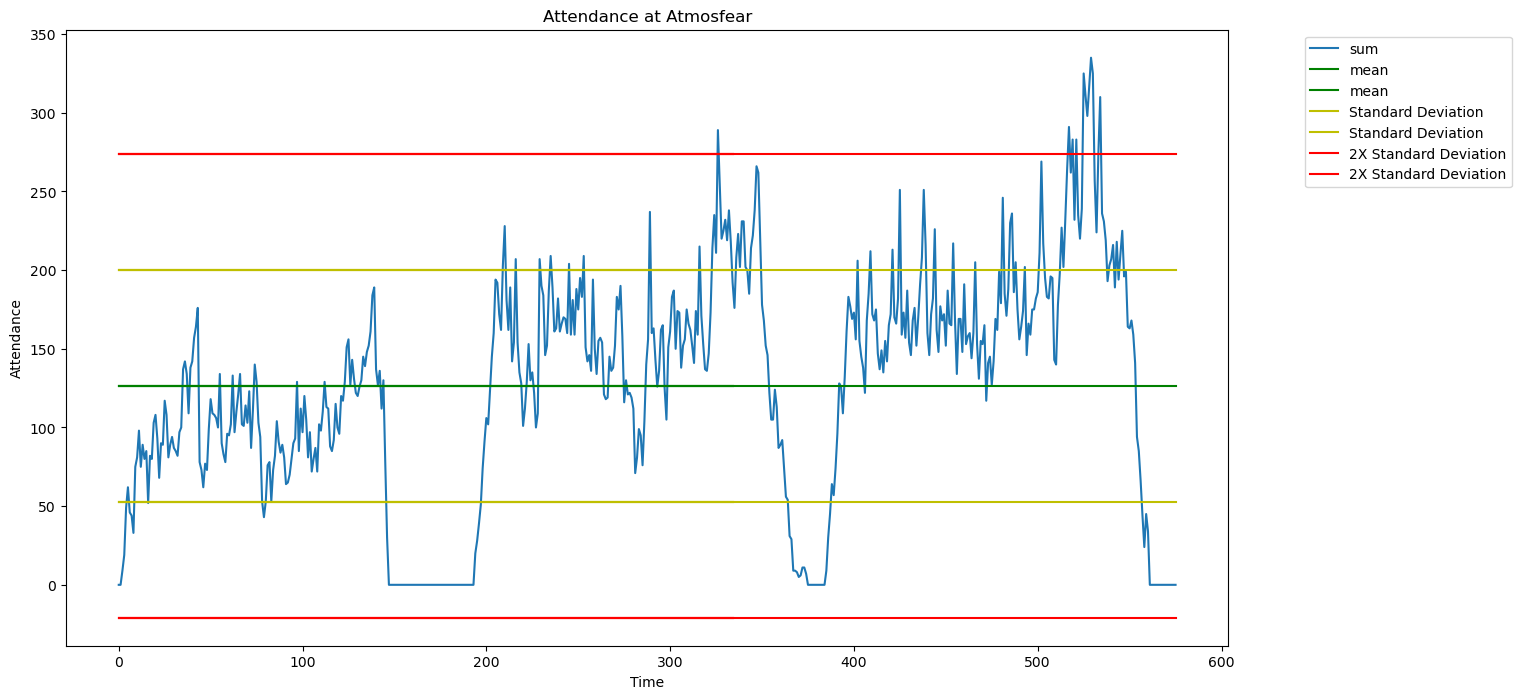

In [1]:
# Graded Part, PartID: BZjRz
# your code here

# The "set-up" code is from the Week 2 Jupyter Notebook Demonstration
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

conn = sqlite3.connect('dinofunworld.db')
c = conn.cursor()

# your code here
#c.execute("SELECT attractionID FROM attraction where Name='Atmosfear'")
c.execute("SELECT visitorID,sequence FROM sequences WHERE sequence LIKE '%-" + str(8) + "-%' ")
seq=c.fetchall()

stats = pd.DataFrame.from_records(seq, columns=['ID', 'sequence'])
stats['sequence_list'] = stats['sequence'].apply(lambda s: [1 if x == str(8) else 0 for x in s.split("-")])
AttSum = np.sum(stats['sequence_list'].values.tolist(), axis=0)

mean = np.nanmean(AttSum)
std = np.nanstd(AttSum)
attendsum=list(enumerate(AttSum))

Atmosfear = pd.DataFrame(attendsum,AttSum, columns=['Interval','sum']) 
Atmosfear.plot.line(y='sum', x='Interval', figsize = (15,8))
plt.plot(attendsum, [mean]*len(AttSum), 'g-', label= 'mean')
plt.plot(attendsum, [mean+std]*len(AttSum), 'y-', label= 'Standard Deviation')
plt.plot(attendsum, [mean-std]*len(AttSum), 'y-')
plt.plot(attendsum, [mean+2*std]*len(AttSum), 'r-', label= '2X Standard Deviation')
plt.plot(attendsum, [mean-2*std]*len(AttSum), 'r-')
plt.legend(loc='upper right',bbox_to_anchor=(1.25,1))

plt.xlabel('Time')
plt.ylabel('Attendance')
plt.title('Attendance at Atmosfear')
plt.show()

### Question 2:
Create and display a moving average chart of the attendance at 'Atmosfear' over the data provided. Use a window size of 50 for this moving average.

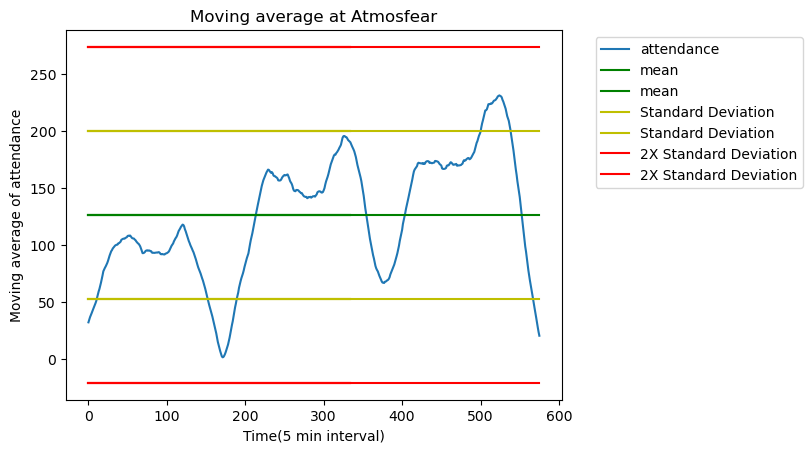

In [2]:
# Graded Part, PartID: Z9m56
# your code here
window = 50
plt.plot(Atmosfear['Interval'], np.convolve(AttSum, np.ones(window,)/window, 'same'), label = 'attendance')

plt.plot(attendsum, [mean]*len(AttSum), 'g-', label= 'mean')
plt.plot(attendsum, [mean+std]*len(AttSum), 'y-', label= 'Standard Deviation')
plt.plot(attendsum, [mean-std]*len(AttSum), 'y-')
plt.plot(attendsum, [mean+2*std]*len(AttSum), 'r-', label= '2X Standard Deviation')
plt.plot(attendsum, [mean-2*std]*len(AttSum), 'r-')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))

plt.ylabel('Moving average of attendance')
plt.xlabel('Time(5 min interval)')
plt.title('Moving average at Atmosfear')
plt.show()

### Question 3:
Create and display an exponentially-weighted moving average chart of the attendance at 'Atmosfear' over the data provided. Again, use a window size of 50 for this weighted moving average.

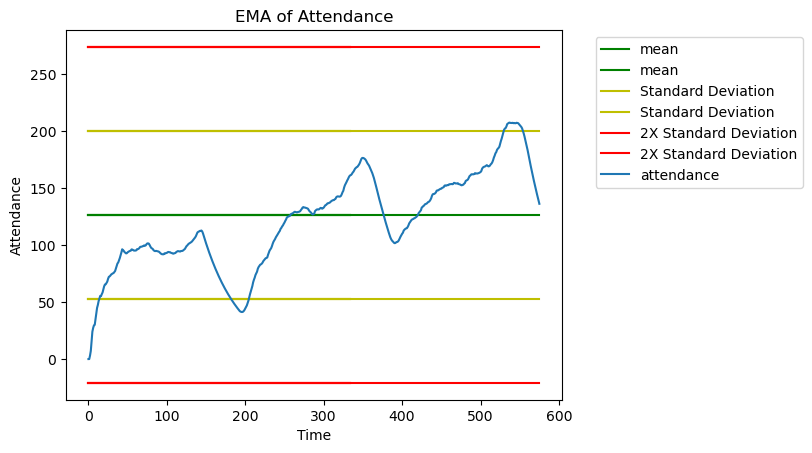

In [3]:
# Graded Part, PartID: 3KxS2
# your code here

Atmosfear = Atmosfear.reset_index(drop=True)
span = 50
means = Atmosfear['sum'].ewm(span).mean()

plt.plot(attendsum, [mean]*len(AttSum), 'g-', label= 'mean')
plt.plot(attendsum, [mean+std]*len(AttSum), 'y-', label= 'Standard Deviation')
plt.plot(attendsum, [mean-std]*len(AttSum), 'y-')
plt.plot(attendsum, [mean+2*std]*len(AttSum), 'r-', label= '2X Standard Deviation')
plt.plot(attendsum, [mean-2*std]*len(AttSum), 'r-')

plt.plot(means, label = 'attendance')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))
plt.ylabel('Attendance')
plt.xlabel('Time')
plt.title('EMA of Attendance')
plt.show()